In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib import cm
import xarray as xr
import pandas as pd
import datetime
import warnings # Silence the warnings from SHARPpy
warnings.filterwarnings("ignore")
from scipy import interpolate
from scipy.ndimage import gaussian_filter
import scipy
#import pymeteo.skewt as skewt
import cProfile
import math
from metpy.interpolate import cross_section
from shapely.geometry import Polygon, Point
import cmweather
#import proplot as pplt
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import measure
from skimage.draw import ellipse, polygon, polygon_perimeter
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import data, io, segmentation, color
from skimage.color import label2rgb
import matplotlib.patches as mpatches
import plotly
import plotly.express as px
import plotly.graph_objects as go
from shapely.validation import make_valid
from sharppy.sharptab import winds, utils, params, thermo, interp, profile
from sharppy.io.spc_decoder import SPCDecoder
import sharppy.plot.skew as skew


import metpy.calc as mpcalc
from metpy.units import units

from matplotlib.ticker import ScalarFormatter, MultipleLocator
from matplotlib.collections import LineCollection
import matplotlib.transforms as transforms
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sharppy.sharptab as tab
from matplotlib import gridspec

In [2]:
dss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_0_0_1m_no_shear_test/cm1out_000001.nc')

In [2]:
lss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_10_35_1m_lss_full/cm1out_000001.nc')
dss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_8_33_1m_dss_full/cm1out_000001.nc')
hss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_6_31_1m_hss_full/cm1out_000001.nc')

In [3]:
theta = dss_dsh.th[0,:,0,0].values*units.kelvin
qv = dss_dsh.qv[0,:,0,0].values*units.kg/units.kg
prs = dss_dsh.prs[0,:,0,0].values*units.pascal
hgt = dss_dsh.zh.values*1000*units.meters
uint = dss_dsh.uinterp[0,:,0,0].values*units.meter_per_second
vint = dss_dsh.vinterp[0,:,0,0].values*units.meter_per_second

prs_hpa = prs.to(units.hectopascal)
temp = mpcalc.temperature_from_potential_temperature(prs, theta)
tempc = temp.magnitude-273.15
tempc = tempc*units.degC
sh = mpcalc.specific_humidity_from_mixing_ratio(qv)
dewp = mpcalc.dewpoint_from_specific_humidity(prs, tempc, sh)
dewp = dewp
#dewp[0:119] = dewp[0:119] - 2
u_kts = uint.to(units.knot)
v_kts = vint.to(units.knot)
wnddir = mpcalc.wind_direction(u_kts, v_kts)
wndspd = mpcalc.wind_speed(u_kts, v_kts)


#prof1 = profile.create_profile(profile='default', pres=prs_hpa, hght=hgt, tmpc=tempc, \
          #                          dwpc=dewp, wspd = wndspd_kts.magnitude, wdir = wnddir.magnitude, missing=-9999, strictQC=False)


In [14]:
theta_hi = hss_dsh.th[0,:,0,0].values*units.kelvin
qv_hi = hss_dsh.qv[0,:,0,0].values*units.kg/units.kg
prs_hi = hss_dsh.prs[0,:,0,0].values*units.pascal
hgt_hi = hss_dsh.zh.values*1000*units.meters
uint_hi = hss_dsh.uinterp[0,:,0,0].values*units.meter_per_second
vint_hi = hss_dsh.vinterp[0,:,0,0].values*units.meter_per_second

prs_hpa_hi = prs_hi.to(units.hectopascal)
temp_hi = mpcalc.temperature_from_potential_temperature(prs_hpa_hi, theta_hi)
tempc_hi = temp_hi.magnitude-273.15
tempc_hi = tempc_hi*units.degC
sh_hi = mpcalc.specific_humidity_from_mixing_ratio(qv_hi)
dewp_hi = mpcalc.dewpoint_from_specific_humidity(prs_hi, tempc_hi, sh_hi)
dewp_hi = dewp_hi
#dewp[0:119] = dewp[0:119] - 2
u_kts_hi = uint_hi.to(units.knot)
v_kts_hi = vint_hi.to(units.knot)
wnddir_hi = mpcalc.wind_direction(u_kts_hi, v_kts_hi)
wndspd_hi = mpcalc.wind_speed(u_kts_hi, v_kts_hi)


#prof1 = profile.create_profile(profile='default', pres=prs_hpa, hght=hgt, tmpc=tempc, \
          #                          dwpc=dewp, wspd = wndspd_kts.magnitude, wdir = wnddir.magnitude, missing=-9999, strictQC=False)


In [15]:
theta_lo = lss_dsh.th[0,:,0,0].values*units.kelvin
qv_lo = lss_dsh.qv[0,:,0,0].values*units.kg/units.kg
prs_lo = lss_dsh.prs[0,:,0,0].values*units.pascal
hgt_lo = lss_dsh.zh.values*1000*units.meters
uint_lo = lss_dsh.uinterp[0,:,0,0].values*units.meter_per_second
vint_lo = lss_dsh.vinterp[0,:,0,0].values*units.meter_per_second

prs_hpa_lo = prs_lo.to(units.hectopascal)
temp_lo = mpcalc.temperature_from_potential_temperature(prs_hpa_lo, theta_lo)
tempc_lo = temp_lo.magnitude-273.15
tempc_lo = tempc_lo*units.degC
sh_lo = mpcalc.specific_humidity_from_mixing_ratio(qv_lo)
dewp_lo = mpcalc.dewpoint_from_specific_humidity(prs_lo, tempc_lo, sh_lo)
dewp_lo = dewp_lo
#dewp[0:119] = dewp[0:119] - 2
u_kts_lo = uint_lo.to(units.knot)
v_kts_lo = vint_lo.to(units.knot)
wnddir_lo = mpcalc.wind_direction(u_kts_lo, v_kts_lo)
wndspd_lo = mpcalc.wind_speed(u_kts_lo, v_kts_lo)


#prof1 = profile.create_profile(profile='default', pres=prs_hpa, hght=hgt, tmpc=tempc, \
          #                          dwpc=dewp, wspd = wndspd_kts.magnitude, wdir = wnddir.magnitude, missing=-9999, strictQC=False)


Text(0.5, 0.98, 'LS Static Stability and Shear Experiments')

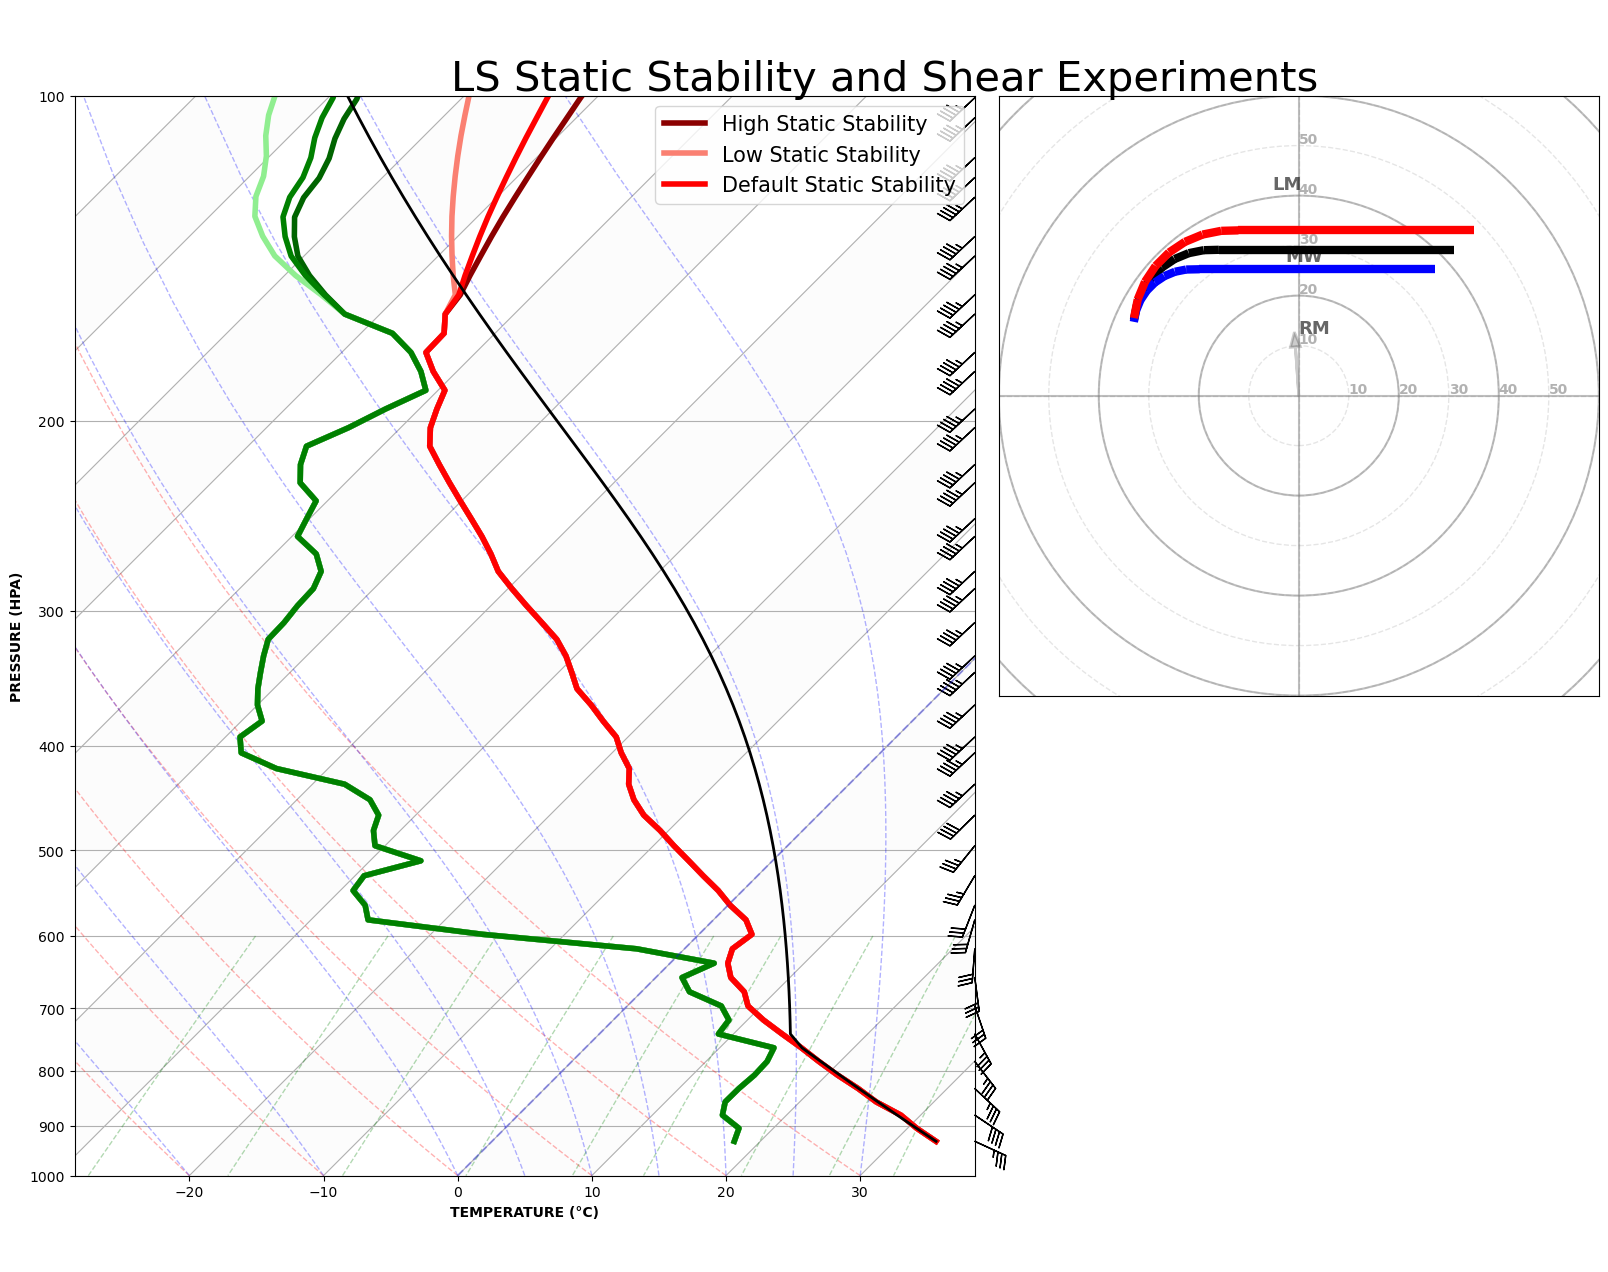

In [18]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(18, 12))
skew = SkewT(fig, rotation=45, rect=(0.05, 0.05, 0.50, 0.90))

# add the Metpy logo
#add_metpy_logo(fig, 105, 85, size='small')

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-20, 30)

# Set some better labels than the default to increase readability
skew.ax.set_xlabel(str.upper(f'Temperature ({tempc.units:~P})'), weight='bold')
skew.ax.set_ylabel(str.upper(f'Pressure ({prs_hpa.units:~P})'), weight='bold')

# Set the facecolor of the skew-t object and the figure to white
fig.set_facecolor('#ffffff')
skew.ax.set_facecolor('#ffffff')

# Here we can use some basic math and Python functionality to make a cool
# shaded isotherm pattern.
x1 = np.linspace(-100, 40, 8)
x2 = np.linspace(-90, 50, 8)
y = [1100, 50]
for i in range(0, 8):
    skew.shade_area(y=y, x1=x1[i], x2=x2[i], color='gray', alpha=0.02, zorder=1)

# STEP 2: PLOT DATA ON THE SKEW-T. TAKE A COUPLE EXTRA STEPS TO
# INCREASE READABILITY
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
# Set the linewidth to 4 for increased readability.
# We will also add the 'label' keyword argument for our legend.

skew.plot(prs_hpa_hi, tempc_hi, 'darkred', lw = 4, label = 'High Static Stability')
skew.plot(prs_hpa_hi, dewp_hi, 'darkgreen', lw = 4)
skew.plot(prs_hpa_lo, tempc_lo, 'salmon', lw = 4, label = 'Low Static Stability')
skew.plot(prs_hpa_lo, dewp_lo, 'lightgreen', lw = 4)
skew.plot(prs_hpa, tempc, 'r', lw=4, label = 'Default Static Stability')
skew.plot(prs_hpa, dewp, 'g', lw=4)

skewleg = skew.ax.legend(loc='best', fontsize = 15)
#plt.hlines(t, -100, 100, "k")

# Again we can use some simple Python math functionality to 'resample'
# the wind barbs for a cleaner output with increased readability.
# Something like this would work.
interval = np.logspace(2, 3, 40) * units.hPa
idx = mpcalc.resample_nn_1d(prs_hpa, interval)
skew.plot_barbs(pressure=prs_hpa[idx], u=u_kts[idx], v=v_kts[idx])

# Add the relevant special lines native to the Skew-T Log-P diagram &
# provide basic adjustments to linewidth and alpha to increase readability
# first, we add a matplotlib axvline to highlight the 0-degree isotherm
skew.ax.axvline(0 * units.degC, linestyle='--', color='blue', alpha=0.3)
skew.plot_dry_adiabats(lw=1, alpha=0.3)
skew.plot_moist_adiabats(lw=1, alpha=0.3)
skew.plot_mixing_lines(lw=1, alpha=0.3)

# Calculate LCL height and plot as a black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from a low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
#lcl_pressure, lcl_temperature = mpcalc.lcl(prs_hpa[0], tempc[0], dewp[0])
#skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(prs_hpa, tempc[0], dewp[0]).to('degC')
skew.plot(prs_hpa, prof, 'k', linewidth=2, label='SB PARCEL PATH')

# Shade areas of CAPE and CIN
#skew.shade_cin(prs_hpa, tempc, prof, dewp, alpha=0.2, label='SBCIN')
#skew.shade_cape(prs_hpa, tempc, prof, alpha=0.2, label='SBCAPE')

# STEP 3: CREATE THE HODOGRAPH INSET. TAKE A FEW EXTRA STEPS TO
# INCREASE READABILITY
# Create a hodograph object: first we need to add an axis
# then we can create the Metpy Hodograph
hodo_ax = plt.axes((0.48, 0.45, 0.5, 0.5))
h = Hodograph(hodo_ax, component_range=60.)

# Add two separate grid increments for a cooler look. This also
# helps to increase readability
h.add_grid(increment=20, ls='-', lw=1.5, alpha=0.5)
h.add_grid(increment=10, ls='--', lw=1, alpha=0.2)

# The next few steps makes for a clean hodograph inset, removing the
# tick marks, tick labels, and axis labels
h.ax.set_box_aspect(1)
h.ax.set_yticklabels([])
h.ax.set_xticklabels([])
h.ax.set_xticks([])
h.ax.set_yticks([])
h.ax.set_xlabel(' ')
h.ax.set_ylabel(' ')

# Here we can add a simple Python for loop that adds tick marks
# to the inside of the hodograph plot to increase readability!
plt.xticks(np.arange(0, 0, 1))
plt.yticks(np.arange(0, 0, 1))
for i in range(10, 60, 10):
    h.ax.annotate(str(i), (i, 0), xytext=(0, 2), textcoords='offset pixels',
                  clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)
for i in range(10, 120, 10):
    h.ax.annotate(str(i), (0, i), xytext=(0, 2), textcoords='offset pixels',
                  clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)

# plot the hodograph itself, using plot_colormapped, colored
# by height
ubshr6, vbshr6 = mpcalc.bulk_shear(prs_hpa, u_kts, v_kts, height=hgt, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)
ubshr62, vbshr62 = mpcalc.bulk_shear(prs_hpa_hi, u_kts_hi, v_kts_hi, height=hgt_hi, depth=6 * units.km)
bshear62 = mpcalc.wind_speed(ubshr62, vbshr62)
ubshr63, vbshr63 = mpcalc.bulk_shear(prs_hpa_lo, u_kts_lo, v_kts_lo, height=hgt_hi, depth=6 * units.km)
bshear63 = mpcalc.wind_speed(ubshr63, vbshr63)
h.plot_colormapped(u_kts, v_kts, c=hgt, linewidth=6, label='0-6 BWS = %0.2f'%bshear6.magnitude + " kts", color = 'black')
h.plot_colormapped(u_kts_hi, v_kts_hi, c=hgt_hi, linewidth= 6, label='0-6 BWS = %0.2f'%bshear62.magnitude + " kts", color = 'blue')
h.plot_colormapped(u_kts_lo, v_kts_lo, c=hgt_lo, linewidth=6, label='0-6 BWS = %0.2f'%bshear63.magnitude + " kts", color = 'red')
#hodo_ax.legend(loc = 'best', fontsize = 15)
# compute Bunkers storm motion so we can plot it on the hodograph!
RM, LM, MW = mpcalc.bunkers_storm_motion(prs_hpa, u_kts, v_kts, hgt)
h.ax.text((RM[0].m + 0.5), (RM[1].m - 0.5), 'RM', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.text((LM[0].m + 0.5), (LM[1].m - 0.5), 'LM', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.text((MW[0].m + 0.5), (MW[1].m - 0.5), 'MW', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.arrow(0, 0, RM[0].m - 0.3, RM[1].m - 0.3, linewidth=2, color='black',
           alpha=0.2, label='Bunkers RM Vector',
           length_includes_head=True, head_width=2)
ubshr6, vbshr6 = mpcalc.bulk_shear(prs_hpa, u_kts, v_kts, height=hgt, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

plt.suptitle('LS Static Stability and Shear Experiments', fontsize = 30)
#print(bshear6)
#print(bshear62)

In [5]:
ubshr6, vbshr6 = mpcalc.bulk_shear(prs_hpa, uint, vint, height=hgt, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

bshear6

33.742077 <Unit('meter_per_second')>

In [40]:
ptgt_trop = calc_trop(theta.magnitude, hgt.magnitude/1000, prs_hpa.magnitude)

4th if
5th if


In [41]:
ptgt_trop

array([11.8])

In [48]:
def find_nearest(array, value):
    array = np.asarray(array)
    step = (np.abs(array - value)) 
    idx = np.nanargmin(step)
    return array[idx], idx

In [49]:
near, nidx = find_nearest(hgt/1000, ptgt_trop)

In [50]:
t = prs_hpa[nidx]